# Weight Initialization

## Our test model for this practical task

In [16]:
# Use the below functionality to execute your model (that you will adjust later step by step)
# This block of code provides you the functionality to train a model. Results are printed after each epoch

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import tqdm


def load_mnist_data(root_path='./data', batch_size=4):
    """
    Loads MNIST dataset into your directory.
    You can change the root_path to point to a already existing path if you want to safe a little bit of memory :)
    """
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))]
    )

    trainset = torchvision.datasets.MNIST(root=root_path, train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root=root_path, train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    print(f'Train Set: {len(trainset)}')
    print(f'Test Set: {len(testset)}')

    return trainloader, testloader


def train_model(model, batch_size: int = 4, epochs: int = 10):
    # we only consider the mnist train data for this example
    train_loader, _ = load_mnist_data(root_path='./data', batch_size=batch_size)

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    model = model.to(device=device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    iterations = 0
    for epoch in range(epochs):
        running_loss = 0.0
        running_accuracy = []
        for imgs, targets in tqdm.tqdm(train_loader, desc=f'Training iteration {epoch + 1}'):
            iterations += 1
            imgs, targets = imgs.to(device=device), targets.to(device=device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(imgs.reshape(imgs.shape[0], -1))

            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()

            # Calculate the Accuracy (how many of all samples are correctly classified?)
            max_outputs = torch.max(outputs, dim=1).indices
            accuracy = (max_outputs.detach() == targets.detach()).to(dtype=torch.float32).mean()
            running_accuracy.append(accuracy)
    
        print(f'Epoch {epoch + 1} finished with loss: {running_loss / len(train_loader):.3f} and accuracy {torch.tensor(running_accuracy).mean():.3f}')

In [17]:
load_mnist_data()


Train Set: 60000
Test Set: 10000


(<torch.utils.data.dataloader.DataLoader at 0x29b40115f70>,
 <torch.utils.data.dataloader.DataLoader at 0x29b4012c160>)

## Training progress with different weight settings

In [18]:
# You can use this model for your tests (of course you can change the architecture a little, but it should not be necessary.)
import torch
import torch.nn as nn


model = nn.Sequential(
    nn.Linear(784, 32),  # input layer (do not change the in_features size of this layer - we need it later)
    nn.Linear(32, 32),
    nn.Linear(32, 10)  # you can change the in_features of this layer but let the out_features at size 10 here - we need it layer
)

### Weight settings

In [20]:
# Find out how to change the weights of the layers from your neural network.
# ATTTENTION: Write your code inside the "with torch.no_grad():" section! This is necessary for changing the weights of the layers

print('Initial Weights: ')
for parameter in model.parameters():
    print(parameter)

Initial Weights: 
Parameter containing:
tensor([[ 0.0129, -0.0208,  0.0286,  ...,  0.0084,  0.0091, -0.0239],
        [ 0.0255,  0.0055,  0.0146,  ...,  0.0137, -0.0022,  0.0182],
        [-0.0225, -0.0200, -0.0281,  ..., -0.0131, -0.0103, -0.0289],
        ...,
        [-0.0104, -0.0313, -0.0306,  ..., -0.0318,  0.0342,  0.0177],
        [-0.0081,  0.0028,  0.0063,  ..., -0.0262, -0.0063, -0.0218],
        [ 0.0068,  0.0027, -0.0053,  ...,  0.0352, -0.0261,  0.0068]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0068,  0.0002,  0.0178,  0.0256,  0.0244,  0.0255,  0.0324,  0.0338,
         0.0012,  0.0098,  0.0250, -0.0064, -0.0057,  0.0032, -0.0158, -0.0213,
         0.0202,  0.0035,  0.0203, -0.0186,  0.0120, -0.0298, -0.0337, -0.0242,
        -0.0315, -0.0080, -0.0254,  0.0334, -0.0200,  0.0164, -0.0329, -0.0007],
       requires_grad=True)
Parameter containing:
tensor([[ 0.1176, -0.0185,  0.0833,  ..., -0.0899,  0.0800,  0.0421],
        [-0.0542, -0.1678, -0.0765,  

#### Zero weights

In [25]:
# Set all weights and biases of your network to zero

with torch.no_grad():
    for parameter in model.parameters():
        parameter.fill_(0)
        print(parameter)
        

Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)
Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)
Parameter containing:
tensor([[0.,

In [27]:
# Train the network with your new settings and take a look at the results
# Run the model training
train_model(model=model, batch_size=4, epochs=3)


# What can you observe?

Train Set: 60000
Test Set: 10000


Training iteration 1:   0%|          | 0/15000 [00:00<?, ?it/s]

Training iteration 1: 100%|██████████| 15000/15000 [00:19<00:00, 768.34it/s]


Epoch 1 finished with loss: 2.301 and accuracy 0.112


Training iteration 2: 100%|██████████| 15000/15000 [00:19<00:00, 778.01it/s]


Epoch 2 finished with loss: 2.301 and accuracy 0.112


Training iteration 3: 100%|██████████| 15000/15000 [00:19<00:00, 786.27it/s]

Epoch 3 finished with loss: 2.301 and accuracy 0.112


#### Constant weights

In [28]:
# Set all weights and biases to constant numbers (e.g. 0.5)
# How does the training progress?

with torch.no_grad():
    for parameter in model.parameters():
        parameter.fill_(.7464)

In [29]:
# Train the network with your new settings and take a look at the results
# Run the model training
train_model(model=model, batch_size=4, epochs=3)

# What can you observe?

Train Set: 60000
Test Set: 10000


Training iteration 1: 100%|██████████| 15000/15000 [00:19<00:00, 766.11it/s]


Epoch 1 finished with loss: 563.356 and accuracy 0.101


Training iteration 2: 100%|██████████| 15000/15000 [00:20<00:00, 734.65it/s]


Epoch 2 finished with loss: 2.765 and accuracy 0.117


Training iteration 3: 100%|██████████| 15000/15000 [00:19<00:00, 773.35it/s]

Epoch 3 finished with loss: 2.356 and accuracy 0.167


In [30]:
# Let us also take a look at the gradient of the output layer
# Access the gradients at the output layer of your model and analyze them

# We first input some random values
# forward + backward
outputs = model(torch.randn(size=(1,784)))
loss = nn.CrossEntropyLoss()(outputs, torch.tensor([1]))
loss.backward()


# Code here
output_gradients = list(model.parameters())[-1].grad

print("Gradients at the Output Layer:")
print(output_gradients)


# What can you observe?
# What we can observe is, that the model changes the weight always the same amount making it unable to learn.

Gradients at the Output Layer:
tensor([ 0.2066, -1.1490,  0.3055,  0.0533,  0.0617,  0.2748,  0.1231,  0.3220,
         0.2519, -0.4500])


#### Unusual weights

In [31]:
# Set some weights (around 50%) of every model of the model to some weird value, e. g. extremely high (> 10.0) or extremely low (< 1e-7).
# How does the training progress? 
# Can your model also diverge instead of converge because the weights were way to high or low?

with torch.no_grad():
    # Code here
    for param in model.parameters():
        param.fill_(1e-8)

output_gradients = list(model.parameters())[-1].grad

print("Gradients at the Output Layer:")
print(output_gradients)


In [33]:
# Train the network with your new settings and take a look at the results
# Run the model training
train_model(model=model, batch_size=4, epochs=5)

# What can you observe?

Train Set: 60000
Test Set: 10000


Training iteration 1:   0%|          | 0/15000 [00:00<?, ?it/s]

Training iteration 1: 100%|██████████| 15000/15000 [00:19<00:00, 769.04it/s]


Epoch 1 finished with loss: 2.301 and accuracy 0.112


Training iteration 2: 100%|██████████| 15000/15000 [00:19<00:00, 773.89it/s]


Epoch 2 finished with loss: 2.301 and accuracy 0.112


Training iteration 3: 100%|██████████| 15000/15000 [00:19<00:00, 771.78it/s]


Epoch 3 finished with loss: 2.301 and accuracy 0.112


Training iteration 4: 100%|██████████| 15000/15000 [00:19<00:00, 774.40it/s]


Epoch 4 finished with loss: 2.301 and accuracy 0.112


Training iteration 5: 100%|██████████| 15000/15000 [00:21<00:00, 710.60it/s]

Epoch 5 finished with loss: 2.301 and accuracy 0.112


## Weight initialization techniques

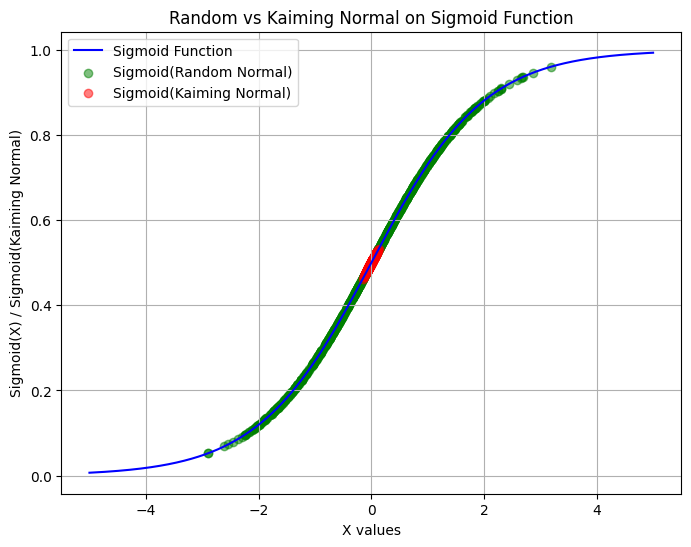

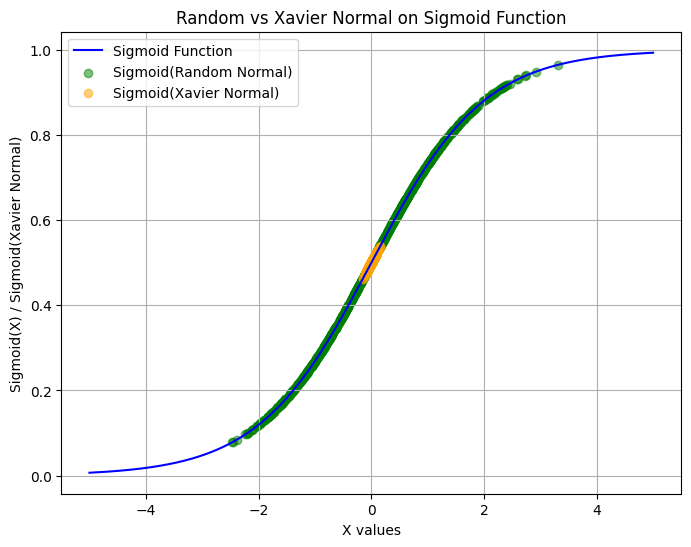

In [67]:
# We now take a closer look to the sigmoid activation function.
# Where does the sigmoid function creates small gradients and where are the biggest gradient?

# Explanation here
'''
For a large x value approximately [10, -infinity) or too small x  value (-infinity, -10] the gradinet of the activation function is almost zero 
cause the change of the function value is close to zero. For a positive large value, the functional value is close to 1 and the negative small value the 
functional value is close to 0. when x = 0, the functional value is 0.5, and the gradient is the biggest around 0.
'''


# Now lets plot some different activation function methods
# Use matplotlib and plot the sigmoid activation function into the plot.
# Create 1000 sample points from x-values [-5.0, 5.0] and create y = Sigmoid(x) and plot the result. (The result should simply be the sigmoid curve)
# You can use the Sigmoid function from PyTorch here!

import matplotlib.pyplot as plt

# Code here
def sigmoid_fct(x):
    return 1/(1+torch.exp(-x))




# Now lets plot the kaiming normal weight initialization into the plot
# Create 1000 points (x) sampled from the kaiming_normal_ (pytorch function) and create y = Sigmoid(kaiming_normal(1000)) and plot the result into the same plot as before.
kaiming_values = torch.nn.init.kaiming_normal_(torch.empty(1000).reshape(1, -1)).reshape(-1)

random_values = torch.randn(1000)
y_values_random = sigmoid_fct(random_values)

x_values = torch.linspace(-5.0, 5.0, 1000)
y_values_kaiming = sigmoid_fct(kaiming_values)

plt.figure(figsize=(8, 6))

plt.plot(x_values, sigmoid_fct(x_values), label='Sigmoid Function', color='blue')
plt.scatter(random_values, y_values_random, label='Sigmoid(Random Normal)', color='green', alpha=0.5)
plt.scatter(kaiming_values, y_values_kaiming, label='Sigmoid(Kaiming Normal)', color='red', alpha=0.5)

plt.title('Random vs Kaiming Normal on Sigmoid Function')
plt.xlabel('X values')
plt.ylabel('Sigmoid(X) / Sigmoid(Kaiming Normal)')
plt.grid(True)

plt.legend()
plt.show()


# Now lets plot a random normal (torch.randn) weight initialization into the plot
# Create 1000 points (x) sampled from the randn (pytorch function) and create y = Sigmoid(randn(1000)) and plot the result into the same plot as before.
# Use a different color for plotting the results





# Now lets plot a xavier_normal weight initialization into the plot
# Create 1000 points (x) sampled from the xavier_normal_ (pytorch function) and create y = Sigmoid(xavier_normal_(1000)) and plot the result into the same plot as before.
# Use a different color for plotting the results


# Code here
plt.figure(figsize=(8, 6))

xavier_values = torch.nn.init.xavier_normal_(torch.empty(1000).reshape(1, -1)).reshape(-1)
y_values_xavier = sigmoid_fct(xavier_values)

random_values = torch.randn(1000)
y_values_random = sigmoid_fct(random_values)

plt.plot(x_values, sigmoid_fct(x_values), label='Sigmoid Function', color='blue')
plt.scatter(random_values, y_values_random, label='Sigmoid(Random Normal)', color='green', alpha=0.5)
plt.scatter(xavier_values, y_values_xavier, label='Sigmoid(Xavier Normal)', color='orange', alpha=0.5)



plt.title('Random vs Xavier Normal on Sigmoid Function')
plt.xlabel('X values')
plt.ylabel('Sigmoid(X) / Sigmoid(Xavier Normal)')
plt.grid(True)

plt.legend()
plt.show()


# Which weight initialization technique is best when using sigmoid activation function?

# Answer here

## Be creative and test some other weight initialization techniques! - There is so much to explore!